In [3]:
!pip install torch torchvision transformers diffusers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.3 MB/s eta 0:00:0000:0100:01


In [6]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image

# Load the pre-trained model
model = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
model = model.to("cuda")  # Use GPU if available


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
# Load an input image
init_image = Image.open("/kaggle/input/kitti-dataset/data_object_image_2/testing/image_2/000000.png").convert("RGB")
init_image = init_image.resize((512, 512))  # Resize to match the model's input size


In [14]:
# Generate a similar image
prompt = "a similar version of this image"
output = model(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5)

# Save the generated image
output.images[0].save("/kaggle/working/generated_images/000000.png")


  0%|          | 0/37 [00:00<?, ?it/s]

In [12]:
import os
# Directories to store real and generated images for FID calculation
real_dir = "input_images"
fake_dir = "generated_images"
os.makedirs(real_dir, exist_ok=True)
os.makedirs(fake_dir, exist_ok=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

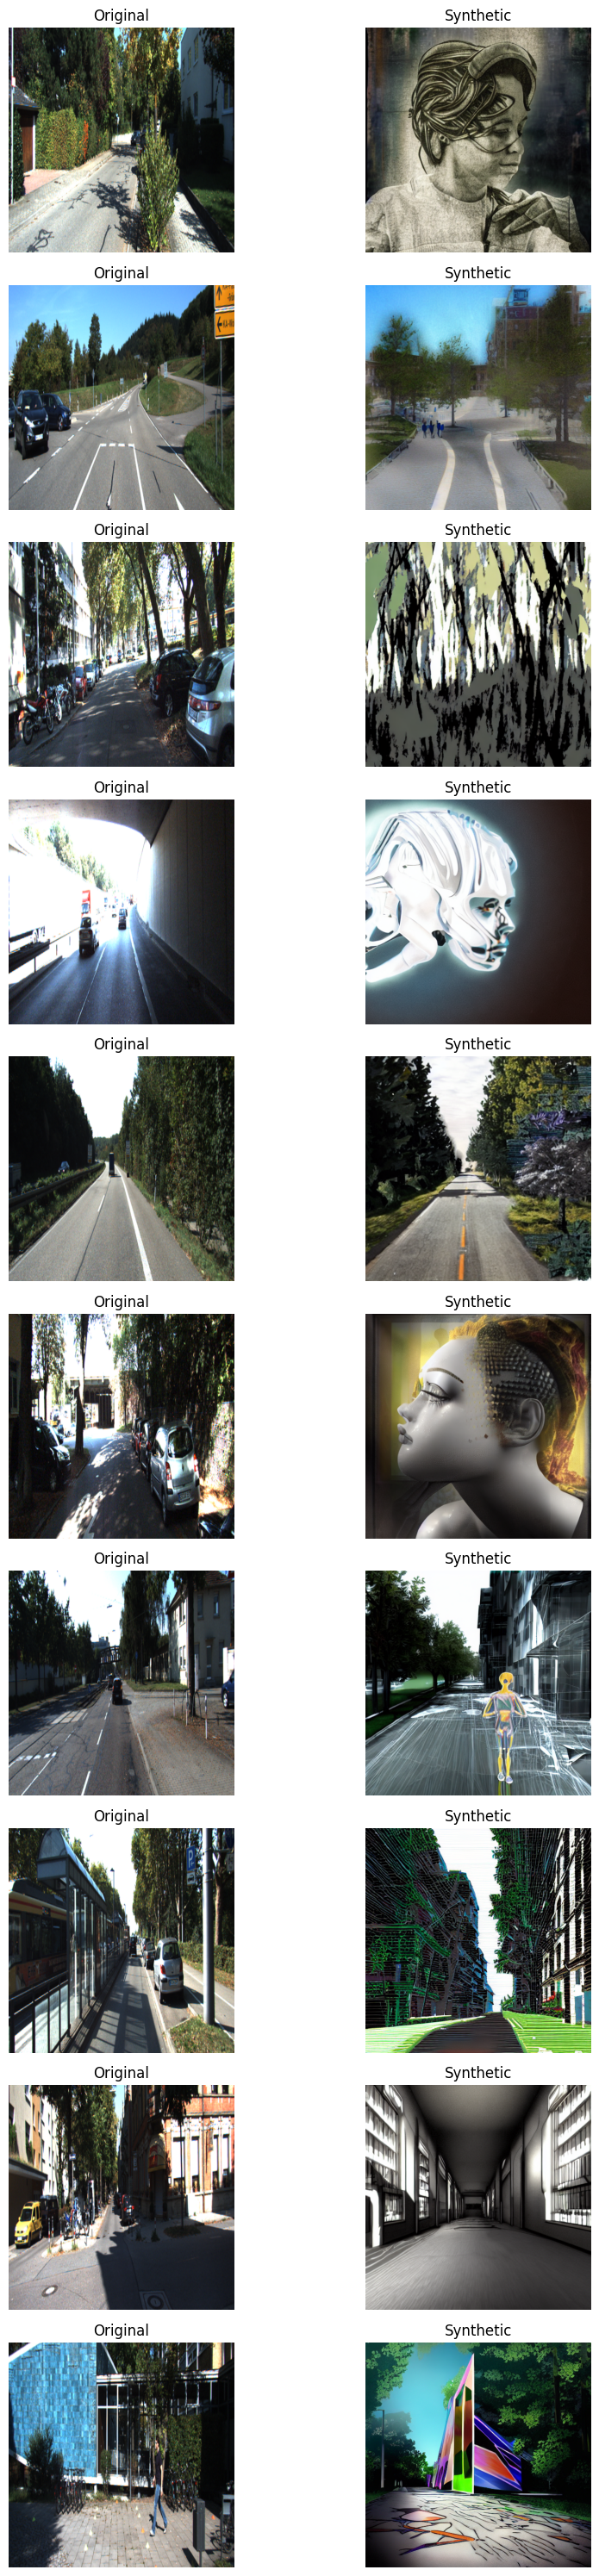

In [17]:
import os
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Load the model
model = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
model = model.to("cuda")

# Directory with input images
input_dir = "/kaggle/input/kitti-dataset/data_object_image_2/testing/image_2"
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
prompt = "a synthetic artistic version of the image"
strength = 0.8
guidance_scale = 7.5

# Process the first 10 images
input_images = sorted(os.listdir(input_dir))[:10]
original_images = []
synthetic_images = []

for image_file in input_images:
    # Load and preprocess the input image
    input_path = os.path.join(input_dir, image_file)
    init_image = Image.open(input_path).convert("RGB")
    init_image = init_image.resize((512, 512))
    original_images.append(init_image)

    # Generate the synthetic image
    output = model(prompt=prompt, image=init_image, strength=strength, guidance_scale=guidance_scale)
    synthetic_image = output.images[0]
    synthetic_images.append(synthetic_image)

    # Save synthetic image
    synthetic_image.save(os.path.join(output_dir, f"synthetic_{image_file}"))

# Visualization: side-by-side comparison
fig, axes = plt.subplots(10, 2, figsize=(10, 30))

for i in range(len(original_images)):
    # Display original image
    axes[i, 0].imshow(original_images[i])
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")
    
    # Display synthetic image
    axes[i, 1].imshow(synthetic_images[i])
    axes[i, 1].set_title("Synthetic")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()
